## Figure-level vs. axes-level functions
- 다른 모듈 외에도 axis-level 또는 figure-level의 시본 함수의 교차 분류가 있다.
- 앞의 내용은 axse-level 함수이다.
- 함수의 반환값인 단일 `matplotlib.pylot.Axes` 객체에 데이터를 그린다.

- 예를 들어 `displot`는 distributions의 모듈의 figure-level 함수이다.
- 기본 동작은 histplot()와 동일한 코드를 사용하여 히스토그램을 그리는 것이다.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_theme(style="white", palette=None)

In [3]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


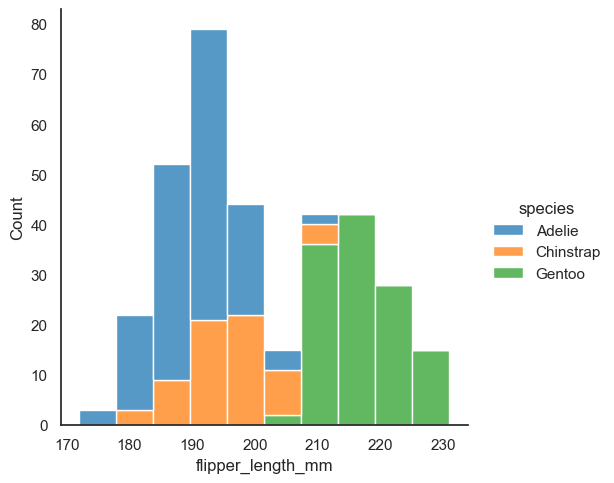

In [4]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', multiple = 'stack')

- kdeplot()과 동일한 코드를 사용하여 커널 밀도 플롯을 그리려면, 종류 매개 변수를 사용하여 선택해라

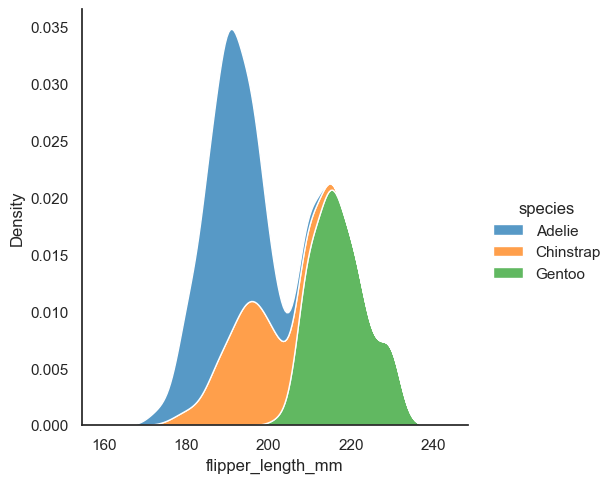

In [5]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', multiple = 'stack', kind = 'kde')

- figure-level 플롯이 대부분 axis-level 인 것처럼 보이지만, 몇 가지 차이점이 있다.
- 특히 legend가 플롯 밖에 있다.
- 이건 또한 약간 다른 모양을 가지고 있다.

- figure-level 함수가 제공하는 가장 유용한 기능은 여러가지 하위 플롯으로 그림을 쉽게 만들 수 있다는 것이다.
    - 예를 들어 같은 축에 각 종의 펭귄에 대한 세 가지 분포를 쌓는 대신, 그림의 기둥을 따로 올려 플로팅하여 `facet` 할 수 있다.

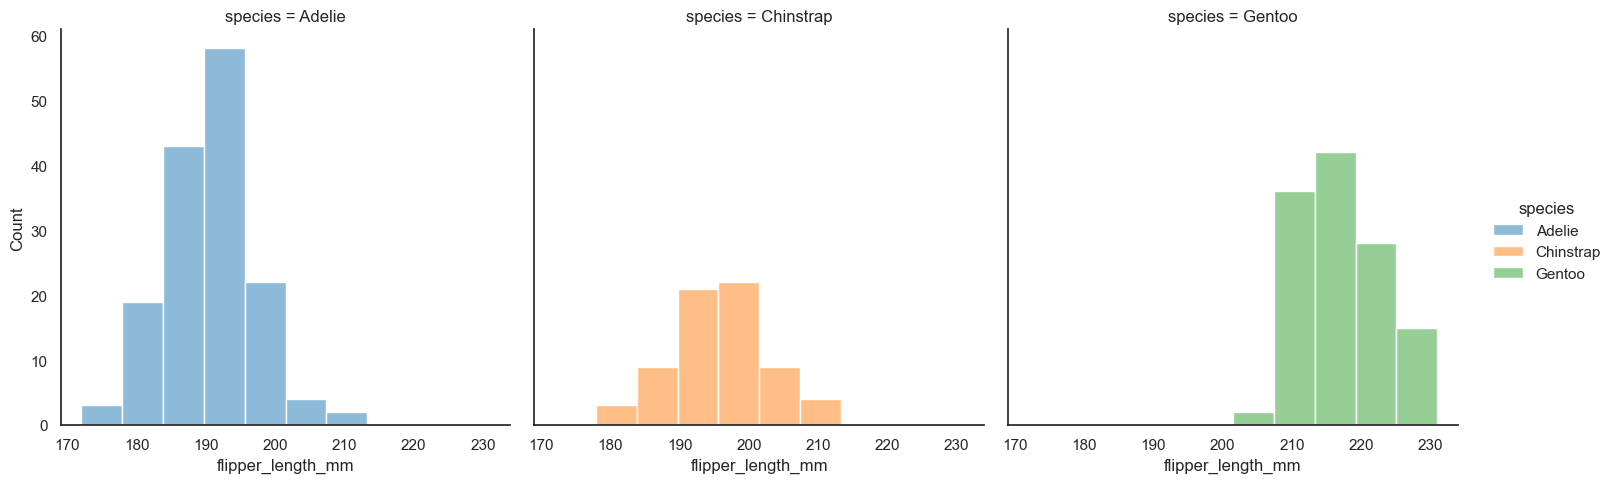

In [6]:
sns.displot(data = penguins, x = 'flipper_length_mm', hue = 'species', col = 'species')

- figure-level 함수는 axis-level 의 대응을 감싸고 특정 kind 키워드 argument를 기본 함수로 전달한다.
- 종류별 파라미터는 독스트링이나 함수의 특성에 나타나지 않는다는 단점이 있다.
- 기능중에 일부는 덜 발견 되며, 특정한 목표를 달성하는 방법을 이해하기 전에 문서의 두 페이지를 살펴봐야한다.

### Axes-level functions make self-contained plots
- axes-level 함수들은 matplotlib 함수의 drop-in 대체물로 작동하도록 작성되었다.
- 축 label과 범례를 자동으로 추가해주지만 그려진 축 외에는 아무것도 수정하지 않는다.
- 그들이 예측가능한 결과로 가진 임의로 복잡한 matplotlib 수치로 구성될 수 있는 것을 의미한다.

- axes-level 함수는 내부적으로 `matplotlib.pyplot.gca()` 함수를 호출하여 matplotlib stat-machine 인터페이스에 연결해서 `cerrently-active` 축에 플롯을 그린다

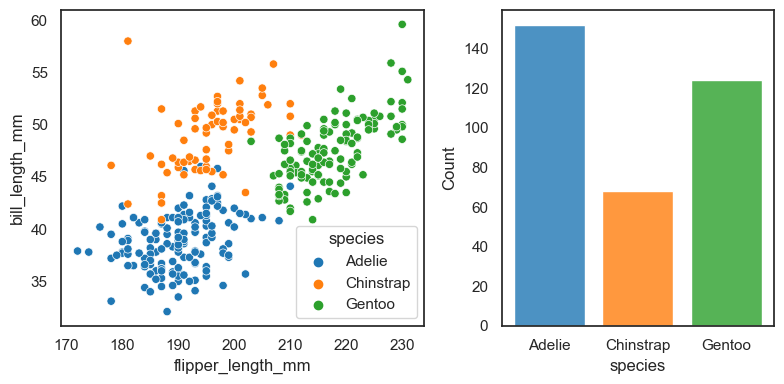

In [10]:
f, axs = plt.subplots(1, 2, figsize = (8,4), gridspec_kw = dict(width_ratios = [4,3]))
sns.scatterplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', hue = 'species', ax = axs[0])
sns.histplot(data = penguins, x = 'species', hue = 'species', shrink = .8, alpha= .8, legend = False, ax = axs[1])
f.tight_layout()

### Figure-level functions own their figure
- 대조적으로 figure-level의 함수는 다른 플롯으로 구성될 수 없다.
- 설계상 figure-level은 초기화를 포함하여 자신의 그림을 소유하기 때문에, 기존 축에 플롯을 그리기 위해 그림 수준의 함수를 사용할 개념이 없다.
- 이 제약은 그림 수준의 기능이 범례를 플롯 외부에 두는 것과 같은 기능을 구현할 수 있게 해준다

그럼에도 불구하고, 그들이 반환하는 객체의 matplotlib 축에 액세스 하고 플롯에 다른 요소를 추가하여 그림 수준의 함수가 제공하는 것을 넘어서는 것이 가능하다.

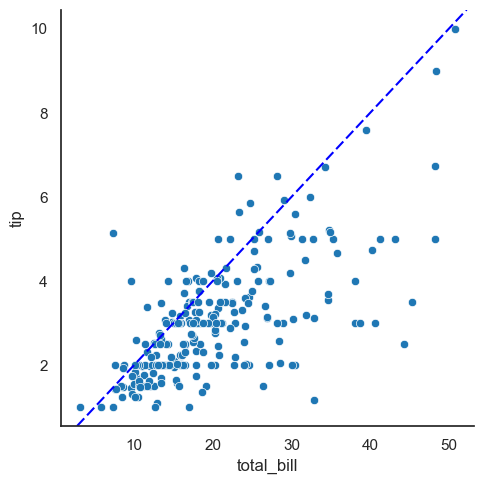

In [11]:
tips = sns.load_dataset('tips')
g = sns.relplot(data = tips, x = 'total_bill', y = 'tip')
g.ax.axline(xy1 = (10,2), slope = .2, color = 'b', dashes = (5,2))

### Cumstomizing plots from a figure-level function
- figure-level 함수는 하위 플롯 조직에 대해 'smart' 방식으로 플롯의 속성을 정의하는 몇 가지 방법이 있는 `FacetGrid`인스턴스를 반환한다.
- 예를 들어, 한 줄의 코드를 사용하여 외부 축의 라벨의 변경할 수 있다.

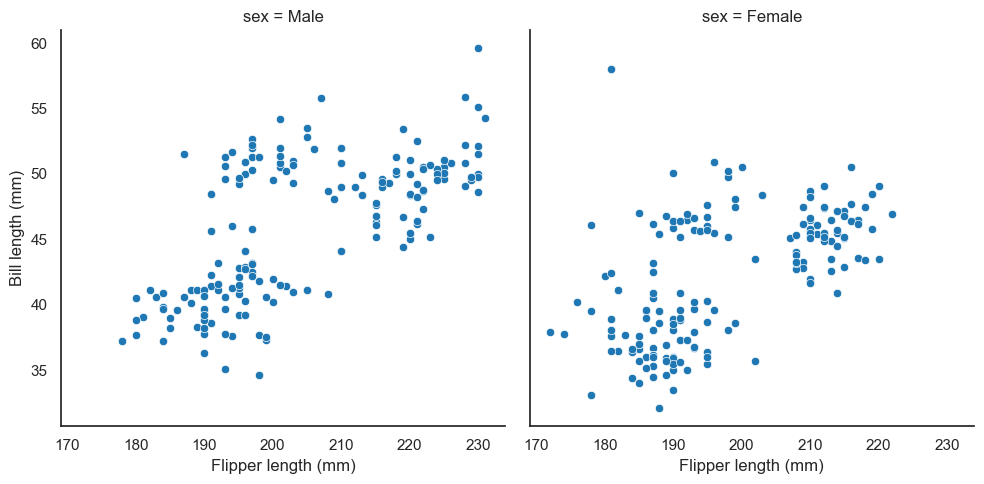

In [12]:
g = sns.relplot(data = penguins, x = 'flipper_length_mm', y = 'bill_length_mm', col = 'sex')
g.set_axis_labels('Flipper length (mm)','Bill length (mm)')

편리하지만 이 방법은 matplotlib API의 일부가 아니며 그림 수준의 함수를 사용할 때만 존재한다는 것을 기억해야 하기 때문에 약간의 복잡성을 더합니다.

### Specifying figure sizes
- Matplotlib 플롯의 크기를 늘리거나 줄이려면, 플롯을 설정하는 동안 전역에서 전체 그림의 너비와 높이를 설정하거나(matpltlib.pyplot.subplots()의 figsize 매개 변수로), 또는 그림 객체의 매서드를 호출한다. (예: matplotlib.Figure.set_size_inches())
- Seaborn에서 축 레벨 함수를 사용할 때, 동일한 규칙이 적용된다.
    - 플롯의 크기는 일부의 그림 크기와 그 그림의 축 레이아웃에 의해 결정된다
    
- 그림 수준의 기능을 사용할 때, 몇가지 주요 차이점이 있다.
    1. 함수자체에는 그림 크기를 제어하는 매개 변수가 있다.(그림을 괄리하는 FacetGrid의 매개변수이긴 함..)
    2. 이러한 매개변수,height와 aspect은 width와 height를 약간 다르게 매개 변수화 한다.
    - matplotlib의 높이 매개변수화 (seaborn 매개변수 사용, 너비 = 높이 * aspect)
- 가장 중요한 것은, 매개변수는 전체 그림의 크기보다는 각 하위 플롯의 크기에 해당한다는 것이다.

> 이러한 접근방식의 차이점을 설명하기 위해, 여기에 하나의 하위 플롯이 있는 matplotlib.pyplot.subplots()의 기본 출력이 있다.

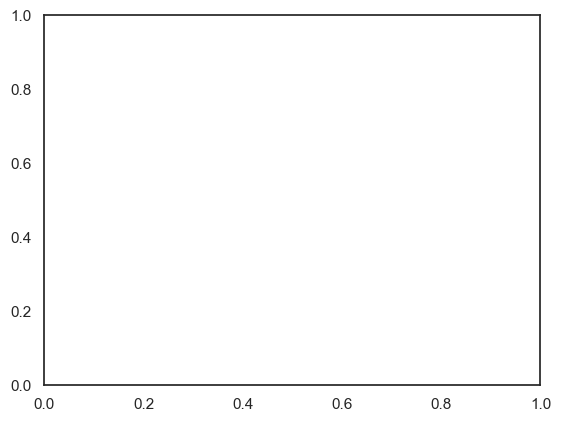

In [13]:
f, ax = plt.subplots()

여러 개의 열이 있는 그림은 전체 크기가 동일하지만, 축은 공간에 맞도록 수평을 압착된다.

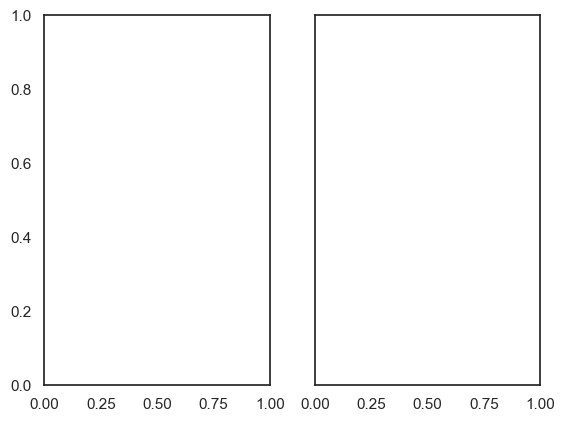

In [15]:
f, ax = plt.subplots(1,2, sharey = True)

반대로, figure-level의 함수에 의해 생성된 플롯은 정사각형이 될 것이다.

이것을 증명하기 위해 FacetGrid를 직접 사용하여 빈 플롯을 설정해보자.

이것은 replot(), displot(), catplot()과 같은 함수 뒤에서 발생한다

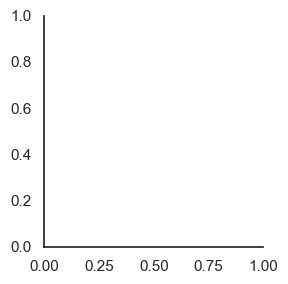

In [16]:
g = sns.FacetGrid(penguins)

추가 열이 추가되면, 그림 자체가 더 넓어져서 하위 플롯이 크기와 모양이 같을 것이다.

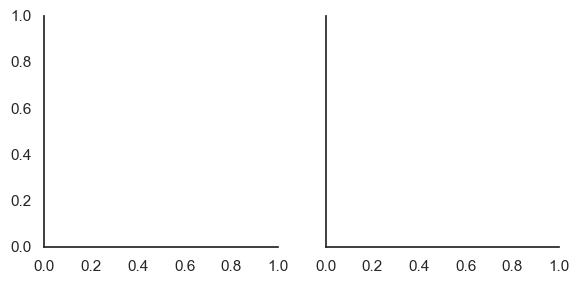

In [17]:
g = sns.FacetGrid(penguins, col = 'sex')

그리고 그림의 총 행과 열 수를 고려하지 않고 각 하위 플롯의 크기와 모양을 조정할 수 있다.

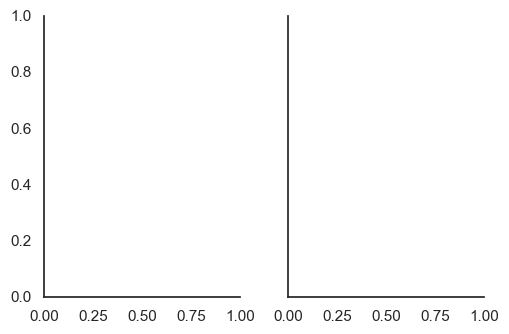

In [18]:
g = sns.FacetGrid(penguins, col = 'sex', height = 3.5, aspect = .75)